<a href="https://colab.research.google.com/github/Joshmen06/Linear-Regression-Project/blob/main/3_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
data=pd.read_csv('/content/SeoulBikeData.csv')

In [5]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Minorlly or Majorly these all are the factors that influence the RBC Column


**Checking for Missing values**

In [7]:
data.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

There are no missing values

**Checking data for outliers**

In [8]:
import seaborn as sns

In [9]:
data['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


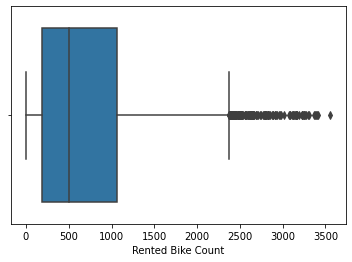

In [10]:
sns.boxplot(data['Rented Bike Count'])

In [11]:
Q1= np.percentile(data['Rented Bike Count'],25,interpolation='midpoint')
Q2= np.percentile(data['Rented Bike Count'],50,interpolation='midpoint')
Q3= np.percentile(data['Rented Bike Count'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

-1120.75
2377.25


In [12]:
Bikes_data= data[data['Rented Bike Count']<upper_limit]
Bikes_data=Bikes_data[Bikes_data['Rented Bike Count']>low_limit]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


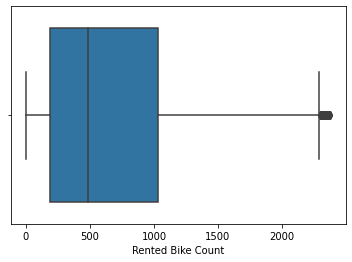

In [13]:
sns.boxplot(Bikes_data['Rented Bike Count'])

In [14]:
Bikes_data['Wind speed (m/s)'].value_counts()

1.1    415
1.2    401
0.9    385
0.8    384
1.0    384
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


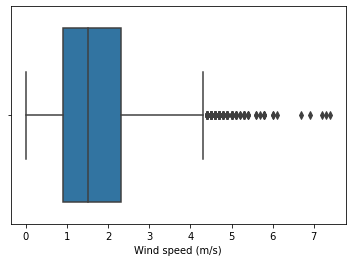

In [15]:
sns.boxplot(Bikes_data['Wind speed (m/s)'])

In [16]:
Q1= np.percentile(Bikes_data['Wind speed (m/s)'],25,interpolation='midpoint')
Q2= np.percentile(Bikes_data['Wind speed (m/s)'],50,interpolation='midpoint')
Q3= np.percentile(Bikes_data['Wind speed (m/s)'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

-1.1999999999999997
4.3999999999999995


In [17]:
Bikes_data= data[data['Wind speed (m/s)']<upper_limit]
Bikes_data=Bikes_data[Bikes_data['Wind speed (m/s)']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


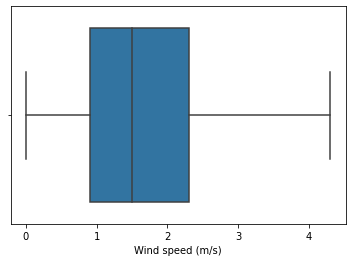

In [18]:
sns.boxplot(Bikes_data['Wind speed (m/s)'])

In [19]:
Bikes_data['Solar Radiation (MJ/m2)'].value_counts()

0.00    4273
0.01     127
0.02      81
0.03      67
0.06      61
        ... 
2.97       1
2.76       1
3.44       1
3.35       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


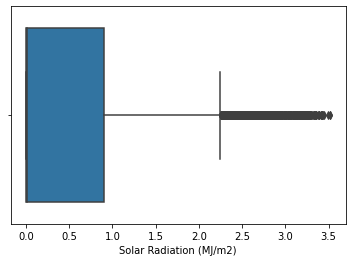

In [20]:
sns.boxplot(Bikes_data['Solar Radiation (MJ/m2)'])

In [21]:
Q1= np.percentile(Bikes_data['Solar Radiation (MJ/m2)'],25,interpolation='midpoint')
Q2= np.percentile(Bikes_data['Solar Radiation (MJ/m2)'],50,interpolation='midpoint')
Q3= np.percentile(Bikes_data['Solar Radiation (MJ/m2)'],75,interpolation='midpoint')
IQR= Q3-Q1
low_limit= Q1 - 1.5* IQR
upper_limit= Q3 + 1.5*IQR
print(low_limit)
print(upper_limit)

-1.35
2.25


In [22]:
Bikes_data= data[data['Solar Radiation (MJ/m2)']<upper_limit]
Bikes_data=Bikes_data[Bikes_data['Solar Radiation (MJ/m2)']>low_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


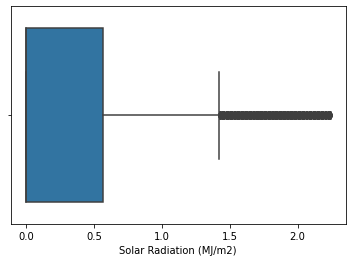

In [23]:
sns.boxplot(Bikes_data['Solar Radiation (MJ/m2)'])

In [24]:
from datetime import datetime
data.Date=pd.to_datetime(data.Date )
data.info()
data['Month']=pd.DatetimeIndex(data['Date']).month
data['Year']=pd.DatetimeIndex(data['Date']).year
data['day']=pd.DatetimeIndex(data['Date']).day
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [44]:
data.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [26]:
data_corr = data.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,2.151618e-01,4.684885e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.036729e-15,2.336763e-14,4.206322e-16
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,3.777958e-01,8.090791e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,3.592468e-02,7.047359e-03
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-3.780878e-03,-6.123440e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,5.238110e-02,-1.068595e-01
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,3.363497e-01,6.970777e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,1.280860e-01,-3.445555e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,2.752192e-02,1.199827e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-2.064178e-01,1.014355e-01


Checking Correlation

In [27]:
import matplotlib.pyplot as plt

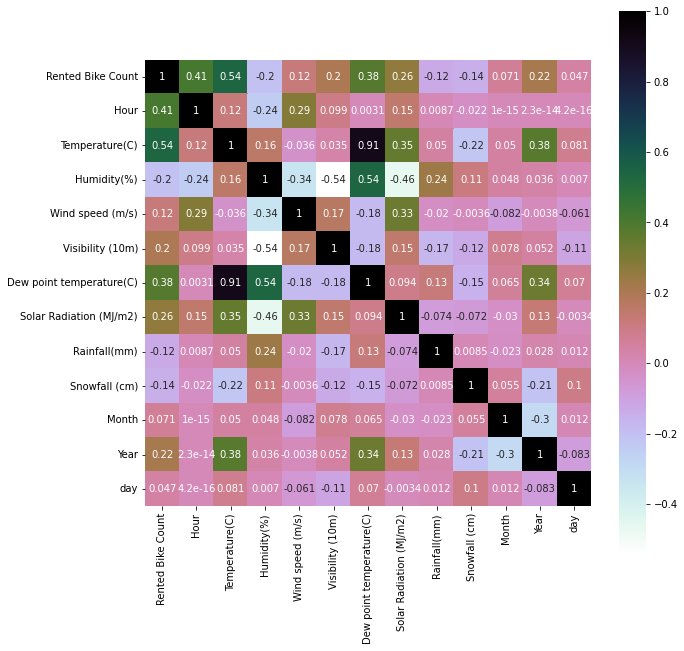

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

Rented Bike Count has a good correlation with Temperature, Temperature is highly correlated with Dew point Temperature, Humidity has a good correlation with Dew point Temperature, 

In [38]:
data.drop('Date',axis =1,inplace= True)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Seasons'] = le.fit_transform(data['Seasons'])
data['Seasons'].unique()

array([3, 1, 2, 0])

In [46]:
data['Holiday'] = le.fit_transform(data['Holiday'])
data['Functioning Day'] = le.fit_transform(data['Functioning Day'])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Seasons                   8760 non-null   int64  
 11  Holiday                   8760 non-null   int64  
 12  Functioning Day           8760 non-null   int64  
 13  Month                     8760 non-null   int64  
 14  Year    

In [48]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data,test_size=0.25)

In [49]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count'] 

In [50]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)


Dimension of train_x dataframe: (6570, 15)
Dimension of train_y dataframe: (6570,)
Dimension of val_x dataframe: (2190, 15)
Dimension of val_y dataframe: (2190,)


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 330.9407437866732
Mean Square Error of linear regression: 200677.073042377
R_Squared Score of linear regression: 0.11977917598088417


In [54]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [55]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([ 2.65097396e+01,  1.11918129e+01, -1.35082005e+01,  1.72195503e+01,
        8.69620711e-03,  2.04013764e+01, -8.50308906e+01, -5.24488950e+01,
        3.58452019e+01, -1.06321448e+02,  1.35309189e+02,  9.20564582e+02,
        1.19525826e+00, -6.80369782e+01, -1.26011156e+00])

In [56]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5347142007941728
number of feature used: 15


In [57]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [58]:
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.681e+06, tolerance: 2.699e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 2.66476524e+01,  1.13225951e+01, -1.32672516e+01,  1.52551766e+01,
        9.37810022e-03,  1.99300519e+01, -8.11998260e+01, -5.18553633e+01,
        3.04703705e+01, -1.01154848e+02,  1.12568305e+02,  8.89671858e+02,
        2.08605533e+00, -4.17257338e+01, -1.08199765e+00])

In [59]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5345669318779394
number of feature used: 15


Ridge score = 0.5347142007941728 ,
Lasso score = 0.5345669318779394